In [ ]:
import cv2
import sys
import csv
 
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if __name__ == '__main__' :
 
    # Set up tracker.
    # Instead of MIL, you can also use
 
    tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'CSRT', 'MOSSE']
    tracker_type = tracker_types[5]
 
    if int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        if tracker_type == 'BOOSTING':
            tracker = cv2.TrackerBoosting_create()
        if tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        if tracker_type == 'KCF':
            tracker = cv2.TrackerKCF_create()
        if tracker_type == 'TLD':
            tracker = cv2.TrackerTLD_create()
        if tracker_type == 'MEDIANFLOW':
            tracker = cv2.TrackerMedianFlow_create()
        if tracker_type == 'CSRT':
            tracker = cv2.TrackerCSRT_create()
        if tracker_type == 'MOSSE':
            tracker = cv2.TrackerMOSSE_create()
 
    # Read video
    video = cv2.VideoCapture("./mass-spring-videos/MAH01524.mp4")
 
    # Exit if video not opened.
    if not video.isOpened():
        print("Could not open video")
        sys.exit()
 
    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print('Cannot read video file')
        sys.exit()
     
    # Define an initial bounding box
    bbox = (287, 23, 86, 320)
 
    # Uncomment the line below to select a different bounding box
    bbox = cv2.selectROI(frame, False)
    
    #create time and position vectors
    t = []
    pos = []
    frame_number = 1
    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)
    
    while True:
        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break
        frame_number += 1
        # Start timer
        timer = cv2.getTickCount()
 
        # Update tracker
        ok, bbox = tracker.update(frame)
 
        # Calculate Frames per second (FPS)
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);
        
        #fill time and position vectors
        t.append(frame_number/32.5)
        pos.append(bbox[1] + bbox[3]/2)
        
        # Draw bounding box
        if ok:
            # Tracking success
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
        else :
            # Tracking failure
            cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)
 
        # Display tracker type on frame
        cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);
     
        # Display FPS on frame
        cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);
 
        # Display result
        cv2.imshow("Tracking", frame)
 
        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27 : break
    
    with open("mass-spring.csv", "w") as file:
        writer = csv.writer(file, delimiter=",")
        writer.writerow("SEP=,")
        writer.writerow(t)
        writer.writerow(pos)

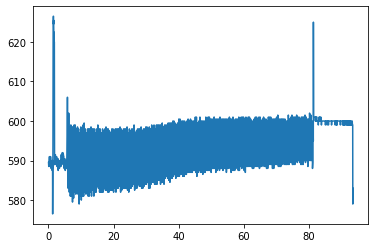

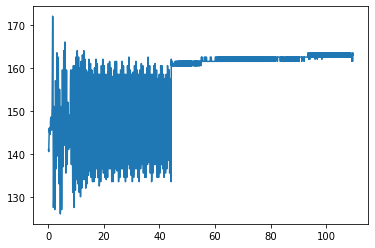

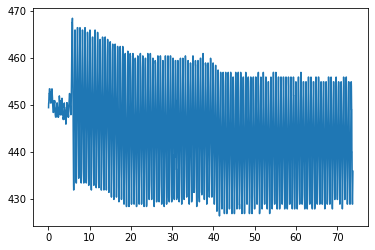

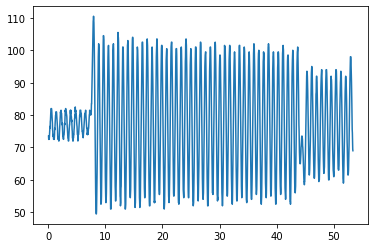

In [13]:
import numpy as np
import matplotlib.pyplot as mp
import csv
def extractData(filename):
    data = []
    with open(filename,"r") as file:
        reader = csv.reader(file, delimiter=',')
        for row in reader:
            data.append(row)

    data[0]= [float(i) for i in data[0]]
    data[2] = [float(i) for i in data[2]]
    data = [data[0],data[2]]
    mp.figure()
    mp.plot(data[0],data[1])
    mp.show
    return data

data10kg1spring=extractData("10kg_1spring.csv")
data10kg1spring=extractData("10kg_3springs.csv")
data10kg1spring=extractData("30kg_1spring.csv")
data10kg1spring=extractData("30kg_3springs.csv")

3030.7523302816335


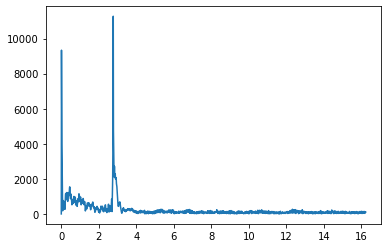

In [5]:
data[1]=data[1]-np.mean(data[1]) #center the data
DFT = np.fft.fft(data[1]) #dft 
Ts = data[0][-1]/len(data[0]) #samping period
fs = 1/Ts #sampling frequency
t_fft = np.arange(0,len(data[0])/2-1,1) #time domain
f_fft = t_fft*fs/len(data[0]) #x-axis dft, Adrien dumbass carried 23/05/2022
#freq =  np.fft.fftfreq(t_fft.shape[-1])
mp.plot(f_fft,abs(DFT[0:int(len(DFT)/2)])*2) #maal 2 is mogelijks bs
mp.show
index = 0
High = np.max(abs(DFT[0:int(len(DFT)/2)])*2) #find max amplitude
for i in range(1,round(len(DFT)/2)): 
    if High == abs(DFT[i])*2:
        index = i
eigenfrequentie = f_fft[index] 
eigenomega = 2*np.pi*eigenfrequentie
k = eigenomega**2*10
print(k)

C:\Users\Stijn\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


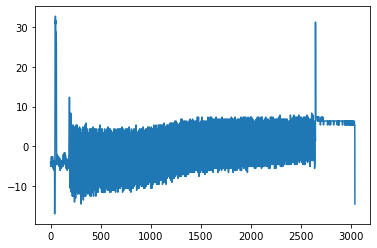

<function matplotlib.pyplot.show(close=None, block=None)>

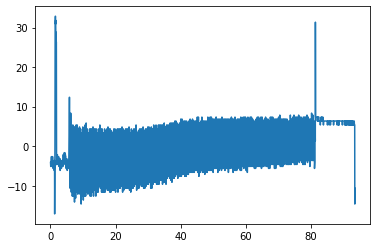

In [4]:
#for i in range(0,len(data[1])):
#    data_t = [[data_t], [data[1][i]]]
    
data_t = [[i] for i in data[1]]
#print(data_t)
a =np.array(data_t*data[1]) 
#print(a)
eigenval, eigenvec = np.linalg.eig(a)
q = round(len(eigenvec)/len(eigenvec))
psi_q = eigenvec[:-1,:q]
psi_q_t = np.transpose(np.array(psi_q))
D_q = np.matmul(data[1][:len(data[1])-1],np.matmul(psi_q,psi_q_t))
mp.plot(D_q)
mp.show()
mp.plot(data[0],data[1])
mp.show